STDLIB

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import ascii

Read in Data

In [109]:
spiral_lambda, spiral_int = np.loadtxt('./NGC_1832-S-BVR-gzs2004_NED.txt', skiprows=3, usecols=(0,1), unpack=True)
ellip_lambda, ellip_int = np.loadtxt('./NGC_4648-S-UBVR-k1992.txt', skiprows=3, usecols=(0,1), unpack=True)
irr_lambda, irr_int = np.loadtxt('./NGC_1569-S-UBVR-k1992.txt', skiprows=3, usecols=(0,1), unpack=True)
quas_lambda, quas_int = np.loadtxt('./HB89_1226+023-S-HB-tcc2012_NED.txt', skiprows=3, usecols=(0,1), unpack=True)

hst_path = '/Users/Alex/Desktop/Kassin_summer_2016/hst_filters/'
f435w, f435t = np.loadtxt(hst_path + 'f435w.WFC1.dat', usecols=(1, 2), unpack=True, skiprows=4)
f475w, f475t = np.loadtxt(hst_path + 'wfc_F475W.dat', usecols=(0, 1), unpack=True)
f555w, f555t = np.loadtxt(hst_path + 'wfc_F555W.dat', usecols=(0, 1), unpack=True)
f606w, f606t = np.loadtxt(hst_path + 'f606w.WFC1.dat', usecols=(1, 2), unpack=True, skiprows=4)
f775w, f775t = np.loadtxt(hst_path + 'f775w.WFC1.dat', usecols=(1, 2), unpack=True, skiprows=4)

earth_lambda, earth_int = np.loadtxt('./earth_24hr_diskavg_03192008.dat', skiprows=10, usecols=(0,1), unpack=True)
earth_low, earth_high = 28530, 12291

a0v_lambda, a0v_int = np.loadtxt('./uka0v.dat', skiprows=3, usecols=(0,1), unpack=True)
g2v_lambda, g2v_int = np.loadtxt('./ukg2v.dat', skiprows=3, usecols=(0,1), unpack=True)
m2i_lambda, m2i_int = np.loadtxt('./ukm2i.dat', skiprows=3, usecols=(0,1), unpack=True)
m4v_lambda, m4v_int = np.loadtxt('./ukm4v.dat', skiprows=3, usecols=(0,1), unpack=True)
o5v_lambda, o5v_int = np.loadtxt('./uko5v.dat', skiprows=3, usecols=(0,1), unpack=True)

star_low, star_high = 473, 1273

print np.max(irr_int)

26.63451


Plot

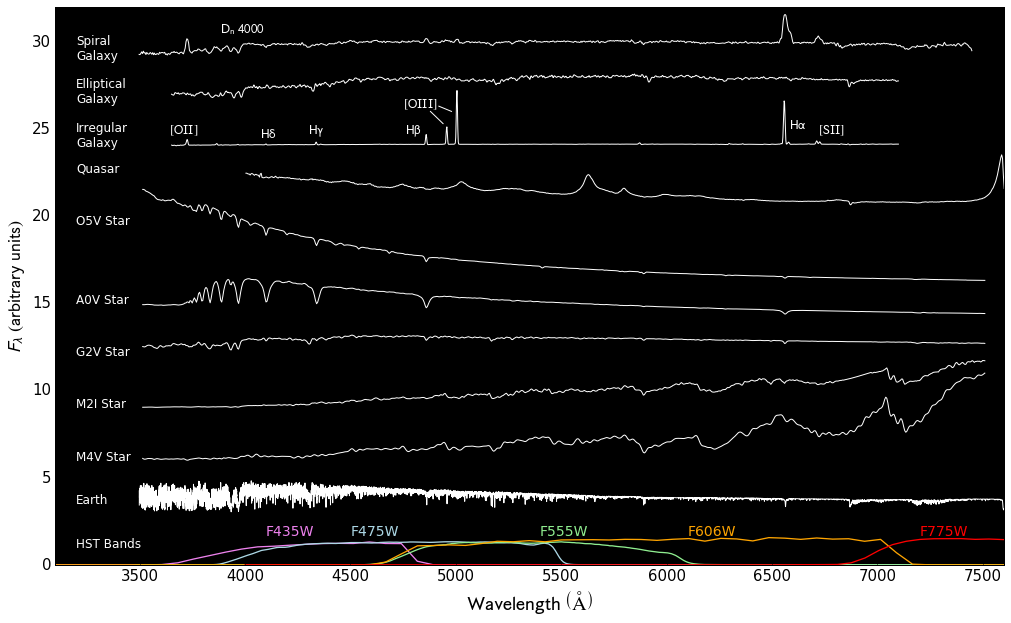

In [279]:
lbl_ft_sz = 18 # label font size
plot_lbl_ft_sz = 12

from matplotlib import rc # needed to modify TeX font; I don't like serif fonts too much
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)

fig = plt.figure(figsize=(17,10)) # create figure and set size - W, H, in inches
ax = plt.subplot(111) # add an axis object

max_y = 32

ax.set_axis_bgcolor('black') # set background color to black
ax.set_xlim(3100, 7600)
ax.set_xticks(np.linspace(3500, 7500, 9))
ax.set_ylim(0, max_y)
plt.setp(ax.get_xticklabels(), fontsize=15) # make x-axis tick marks larger
plt.setp(ax.get_yticklabels(), fontsize=15)
ax.set_xlabel(r'$\rm{Wavelength} \ \left(\AA \right)$', size=lbl_ft_sz + 2) # label x-axis
ax.set_ylabel(r'$F_{\lambda} \ (\rm{arbitrary \ units})$', size=lbl_ft_sz)

ax.plot(spiral_lambda, 1.5 * spiral_int + max_y - 3.5, color='white')
ax.plot(ellip_lambda, 1.5 * ellip_int + max_y - 5.5, color='white')
ax.plot(irr_lambda, 0.12 * irr_int + max_y - 8, color='white')
ax.plot(quas_lambda, 6e14 * quas_int + max_y - 12, color='white')

ax.plot(o5v_lambda[star_low:star_high], o5v_int[star_low:star_high] + max_y - 16, color='white')
ax.plot(a0v_lambda[star_low:star_high], a0v_int[star_low:star_high] + max_y - 18, color='white')
ax.plot(g2v_lambda[star_low:star_high], g2v_int[star_low:star_high] + max_y - 20, color='white')
ax.plot(m2i_lambda[star_low:star_high], m2i_int[star_low:star_high] + max_y - 23, color='white')
ax.plot(m4v_lambda[star_low:star_high], m4v_int[star_low:star_high] + max_y - 26, color='white')

ax.plot(1e4 * earth_lambda[earth_high:earth_low], 0.015 * earth_int[earth_high:earth_low] + max_y - 29, color='white')

ax.plot(f435w, f435t * 3.5, linewidth=1.3, color='violet')
ax.text(4100, 1.7, 'F435W', size=lbl_ft_sz - 4, color='violet')

ax.plot(f475w, f475t * 3.5, linewidth=1.3, color='lightblue')
ax.text(4500, 1.7, 'F475W', size=lbl_ft_sz - 4, color='lightblue')

ax.plot(f555w, f555t * 3.5, linewidth=1.3, color='lightgreen')
ax.text(5400, 1.7, 'F555W', size=lbl_ft_sz - 4, color='lightgreen')

ax.plot(f606w, f606t * 3.5, linewidth=1.3, color='orange')
ax.text(6100, 1.7, 'F606W', size=lbl_ft_sz-4, color='orange')

ax.plot(f775w, f775t * 3.5, linewidth=1.3, color='red')
ax.text(7200, 1.7, 'F775W', size=lbl_ft_sz-4, color='red')

ax.text(3200, max_y - 3, 'Spiral\nGalaxy', color='white', size=lbl_ft_sz - 6)
ax.text(3200, max_y - 5.5, 'Elliptical\nGalaxy', color='white', size=lbl_ft_sz - 6)
ax.text(3200, max_y - 8, 'Irregular\nGalaxy', color='white', size=lbl_ft_sz - 6)
ax.text(3200, max_y - 9.5, 'Quasar', color='white', size=lbl_ft_sz - 6)
ax.text(3200, max_y - 12.5, 'O5V Star', color='white', size=lbl_ft_sz - 6)
ax.text(3200, max_y - 17, 'A0V Star', color='white', size=lbl_ft_sz - 6)
ax.text(3200, max_y - 20, 'G2V Star', color='white', size=lbl_ft_sz - 6)
ax.text(3200, max_y - 23, 'M2I Star', color='white', size=lbl_ft_sz - 6)
ax.text(3200, max_y - 26, 'M4V Star', color='white', size=lbl_ft_sz - 6)
ax.text(3200, max_y - 28.5, 'Earth', color='white', size=lbl_ft_sz - 6)
ax.text(3200, max_y - 31, 'HST Bands', color='white', size=lbl_ft_sz - 6)

ax.text(3880, 30.5, r'$\rm{D}_{\rm{n}} \ 4000$', color='white', size=lbl_ft_sz - 5)
ax.text(6580, 25, r'$\rm{H}\alpha$', color='white', size=lbl_ft_sz - 5)
ax.text(6720, 24.7, r'$[\rm{SII}]$', color='white', size=lbl_ft_sz - 5)
ax.text(4750, 26.2, r'$[\rm{OIII}]$', color='white', fontsize=lbl_ft_sz - 5)
ax.plot([4880, 4940], [26, 25.3], color='white')
ax.plot([4920, 4980], [26.3, 26], color='white')
ax.text(4760, 24.7, r'$\rm{H}\beta$', color='white', size=lbl_ft_sz - 5)
ax.text(4300, 24.7, r'$\rm{H}\gamma$', color='white', size=lbl_ft_sz - 5)
ax.text(4070, 24.5, r'$\rm{H}\delta$', color='white', size=lbl_ft_sz - 5)
ax.text(3640, 24.7, r'$[\rm{OII}]$', color='white', size=lbl_ft_sz - 5)

plt.savefig('sotzen_wang_delavega_171_618_spectra_plot.jpg', format='jpg', dpi=130)

plt.show()